In [25]:
!pip install transformers

Importing Necessary Libraries & Data preprocessing & Loading the data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Use pandas to directly read the csv file into a DataFrame
def load_data(file_path):
    # Assuming your csv file has a header row, adjust if needed
    data = pd.read_csv(file_path)
    return data

# Load the data
file_path = '/content/Synthetic_twitter_dataset_with_aspects.csv'
data = load_data(file_path)

# Data exploration
print(data.head())
print(f"\nLoaded {len(data)} rows")
print(data['sentiment'].value_counts())

# Visualize sentiment distribution
import matplotlib.pyplot as plt

data['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.savefig('sentiment_distribution.png')
plt.close()

                                       tweet sentiment     aspect_category
0         The product is not durable at all.  negative          Durability
1         The value for money is acceptable.   neutral     Value for Money
2     I'm happy with the overall experience.  positive  Overall Experience
3     The product did not meet my standards.  negative     Product Quality
4  The product did not meet my expectations.  negative     Product Quality

Loaded 2999 rows
sentiment
positive    1551
negative     896
neutral      552
Name: count, dtype: int64


In [27]:
# Load the data
file_path = '/content/Synthetic_twitter_dataset_with_aspects.csv'
data = load_data(file_path)

print(data.head())
print(f"\nLoaded {len(data)} rows")
print(data['sentiment'].value_counts())

                                       tweet sentiment     aspect_category
0         The product is not durable at all.  negative          Durability
1         The value for money is acceptable.   neutral     Value for Money
2     I'm happy with the overall experience.  positive  Overall Experience
3     The product did not meet my standards.  negative     Product Quality
4  The product did not meet my expectations.  negative     Product Quality

Loaded 2999 rows
sentiment
positive    1551
negative     896
neutral      552
Name: count, dtype: int64


In [28]:
# Text preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [29]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [30]:
# Verify the columns in the DataFrame
print("Columns in DataFrame:", data.columns)
print(data.head())

# Ensure the column 'tweet' exists and preprocess it
if 'tweet' in data.columns:
    # Example preprocessing function
    def preprocess_text(text):
        # Your text preprocessing steps, e.g., lowercasing, removing stopwords, etc.
        return text.lower()

    # Apply preprocessing function and create 'processed_text' column
    data['processed_text'] = data['tweet'].apply(preprocess_text)
    print("After preprocessing, DataFrame columns are:", data.columns)
    print(data.head())
else:
    print("Column 'tweet' not found.")

# Ensure 'sentiment' column exists
if 'sentiment' not in data.columns:
    print("Column 'sentiment' not found in DataFrame. Available columns are:", data.columns)

# Split the data
if 'processed_text' in data.columns and 'sentiment' in data.columns:
    X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['sentiment'], test_size=0.2, random_state=42)
else:
    print("'processed_text' or 'sentiment' column not found in DataFrame.")


Columns in DataFrame: Index(['tweet', 'sentiment', 'aspect_category'], dtype='object')
                                       tweet sentiment     aspect_category
0         The product is not durable at all.  negative          Durability
1         The value for money is acceptable.   neutral     Value for Money
2     I'm happy with the overall experience.  positive  Overall Experience
3     The product did not meet my standards.  negative     Product Quality
4  The product did not meet my expectations.  negative     Product Quality
After preprocessing, DataFrame columns are: Index(['tweet', 'sentiment', 'aspect_category', 'processed_text'], dtype='object')
                                       tweet sentiment     aspect_category  \
0         The product is not durable at all.  negative          Durability   
1         The value for money is acceptable.   neutral     Value for Money   
2     I'm happy with the overall experience.  positive  Overall Experience   
3     The product did no

In [31]:
# Define models
models = {
    'SVM': LinearSVC(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier()
}

In [32]:
# Train and evaluate models
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    results[name] = pipeline


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.99      1.00      1.00       167
     neutral       1.00      0.97      0.99       114
    positive       0.99      1.00      1.00       319

    accuracy                           0.99       600
   macro avg       1.00      0.99      0.99       600
weighted avg       1.00      0.99      0.99       600


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.99      0.98       167
     neutral       0.99      0.95      0.97       114
    positive       0.99      0.99      0.99       319

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600


Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       167
     neutral       1.00    

In [19]:
# Visualize results
model_names = list(results.keys())
accuracies = [classification_report(y_test, model.predict(X_test), output_dict=True)['accuracy'] for model in results.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.savefig('model_accuracies.png')
plt.close()

In [20]:
# Select the best model (highest accuracy)
best_model_name = model_names[np.argmax(accuracies)]
best_model = results[best_model_name]

print(f"\nBest Model: {best_model_name}")



Best Model: Random Forest


In [21]:
# Confusion Matrix for the best model
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.close()

In [22]:
 # Feature importance (if applicable)
if best_model_name in ['SVM', 'Random Forest']:
    tfidf_vectorizer = best_model.named_steps['tfidf']
    classifier = best_model.named_steps['classifier']

    if best_model_name == 'SVM':
        feature_importance = abs(classifier.coef_[0])
    else:  # Random Forest
        feature_importance = classifier.feature_importances_

    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get top 20 features
    top_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:20]

    plt.figure(figsize=(12, 8))
    sns.barplot(x=[f[1] for f in top_features], y=[f[0] for f in top_features])
    plt.title(f'Top 20 Important Features - {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.close()

In [23]:
# Save the best model
import joblib
joblib.dump(best_model, 'best_sentiment_model.joblib')

print("\nBest model saved as 'best_sentiment_model.joblib'")


Best model saved as 'best_sentiment_model.joblib'


In [27]:
# Sample prediction
sample_text = "Delivery was fast and efficient."
processed_sample = preprocess_text(sample_text)
prediction = best_model.predict([processed_sample])
print(f"\nSample text: {sample_text}")
print(f"Predicted sentiment: {prediction[0]}")


Sample text: Delivery was fast and efficient.
Predicted sentiment: positive


In [26]:
# Sample prediction
sample_text = "The product did not meet my expectations."
processed_sample = preprocess_text(sample_text)
prediction = best_model.predict([processed_sample])
print(f"\nSample text: {sample_text}")
print(f"Predicted sentiment: {prediction[0]}")


Sample text: The product did not meet my expectations.
Predicted sentiment: negative


Deep Learning tecniques

1.  Loading & Data preprocessing



In [2]:
!pip install transformers

In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/Synthetic_twitter_dataset_with_aspects.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,tweet,sentiment,aspect_category
0,The product is not durable at all.,negative,Durability
1,The value for money is acceptable.,neutral,Value for Money
2,I'm happy with the overall experience.,positive,Overall Experience
3,The product did not meet my standards.,negative,Product Quality
4,The product did not meet my expectations.,negative,Product Quality


Polarity Distribution

<ipython-input-4-eaba089b979c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


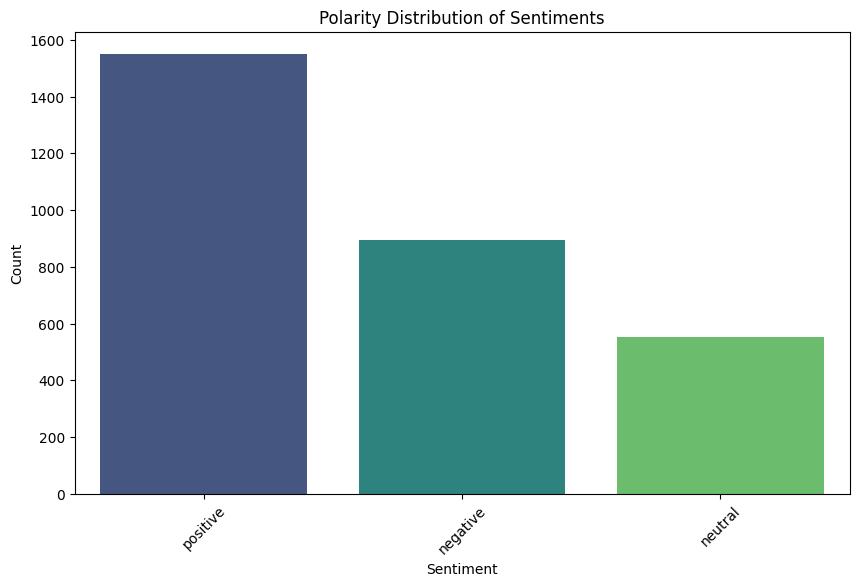

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Synthetic_twitter_dataset_with_aspects.csv'
data = pd.read_csv(file_path)

# Example columns in the dataset
label_column = 'sentiment'

# Count the occurrences of each sentiment
sentiment_counts = data[label_column].value_counts()

# Plot the polarity distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Polarity Distribution of Sentiments')
plt.xticks(rotation=45)
plt.show()


Aspect Category Distribution

<ipython-input-5-19481f69f85c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette='viridis')


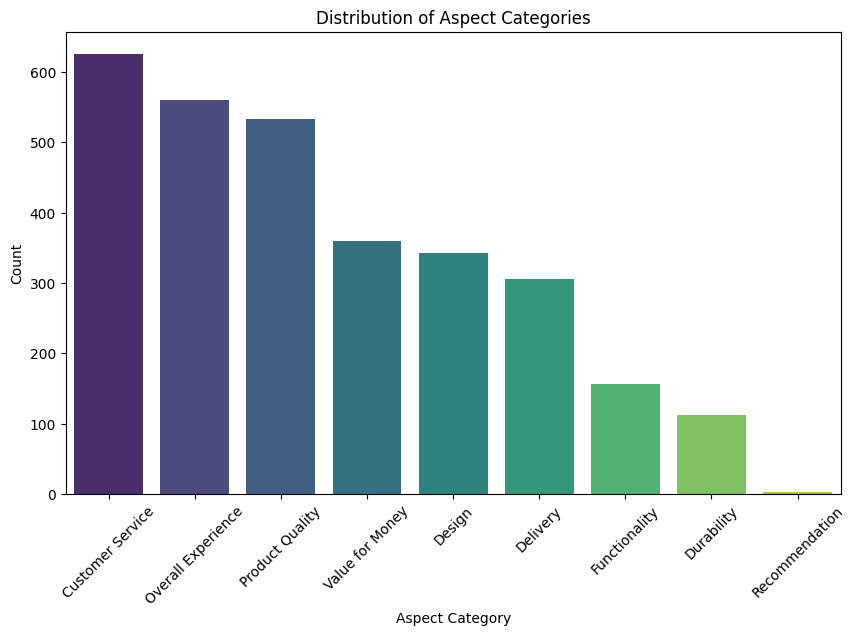

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Synthetic_twitter_dataset_with_aspects.csv'
data = pd.read_csv(file_path)

# Example column in the dataset for aspect category
aspect_column = 'aspect_category'  # Replace with your actual aspect category column name

# Check if the column exists
if aspect_column not in data.columns:
    raise ValueError(f"Column '{aspect_column}' does not exist in the dataset")

# Count the occurrences of each aspect category
aspect_counts = data[aspect_column].value_counts()

# Plot the aspect category distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette='viridis')
plt.xlabel('Aspect Category')
plt.ylabel('Count')
plt.title('Distribution of Aspect Categories')
plt.xticks(rotation=45)
plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D, LSTM, Dropout

# Load the dataset
file_path = '/content/Synthetic_twitter_dataset_with_aspects.csv'
data = pd.read_csv(file_path)

# Example columns in the dataset
text_column = 'tweet'
label_column = 'sentiment'

# Check if the columns exist
if text_column not in data.columns or label_column not in data.columns:
    raise ValueError(f"Columns '{text_column}' or '{label_column}' do not exist in the dataset")

# Check for NaN values
if data[text_column].isnull().any() or data[label_column].isnull().any():
    raise ValueError("NaN values found in the dataset. Please clean the data")

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data[text_column].values)
sequences = tokenizer.texts_to_sequences(data[text_column].values)

# Padding sequences
max_length = 100  # Example maximum sequence length
X = pad_sequences(sequences, maxlen=max_length)

# Encode the labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data[label_column].values)
y = to_categorical(integer_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2399, 100)
Shape of X_test: (600, 100)
Shape of y_train: (2399, 3)
Shape of y_test: (600, 3)


Implement Deep Learning Models >>>MLP

In [7]:
# Define the MLP model
mlp_model = Sequential()
mlp_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length))
mlp_model.add(Flatten())
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(y.shape[1], activation='softmax'))

# Compile the MLP model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MLP model
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Extract and calculate accuracy percentages for MLP
mlp_train_accuracy = mlp_history.history['accuracy'][-1] * 100
mlp_val_accuracy = mlp_history.history['val_accuracy'][-1] * 100
print(f"MLP Final Training Accuracy: {mlp_train_accuracy:.2f}%")
print(f"MLP Final Validation Accuracy: {mlp_val_accuracy:.2f}%")


Epoch 1/10
75/75 [==============================] - 5s 34ms/step - loss: 0.7893 - accuracy: 0.6407 - val_loss: 0.3755 - val_accuracy: 0.9100
Epoch 2/10
75/75 [==============================] - 2s 24ms/step - loss: 0.1833 - accuracy: 0.9629 - val_loss: 0.0916 - val_accuracy: 0.9883
Epoch 3/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0475 - accuracy: 0.9921 - val_loss: 0.0619 - val_accuracy: 0.9950
Epoch 4/10
75/75 [==============================] - 2s 21ms/step - loss: 0.0208 - accuracy: 0.9983 - val_loss: 0.0572 - val_accuracy: 0.9950
Epoch 5/10
75/75 [==============================] - 1s 17ms/step - loss: 0.0109 - accuracy: 0.9992 - val_loss: 0.0553 - val_accuracy: 0.9950
Epoch 6/10
75/75 [==============================] - 1s 17ms/step - loss: 0.0068 - accuracy: 0.9996 - val_loss: 0.0525 - val_accuracy: 0.9950
Epoch 7/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0043 - accuracy: 0.9996 - val_loss: 0.0531 - val_accuracy: 0.9950
Epoch 8/10
75

CNN Model

In [8]:
# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(y.shape[1], activation='softmax'))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Extract and calculate accuracy percentages for CNN
cnn_train_accuracy = cnn_history.history['accuracy'][-1] * 100
cnn_val_accuracy = cnn_history.history['val_accuracy'][-1] * 100
print(f"CNN Final Training Accuracy: {cnn_train_accuracy:.2f}%")
print(f"CNN Final Validation Accuracy: {cnn_val_accuracy:.2f}%")


Epoch 1/10
75/75 [==============================] - 3s 27ms/step - loss: 0.7471 - accuracy: 0.6719 - val_loss: 0.2440 - val_accuracy: 0.9633
Epoch 2/10
75/75 [==============================] - 2s 25ms/step - loss: 0.0702 - accuracy: 0.9842 - val_loss: 0.0694 - val_accuracy: 0.9917
Epoch 3/10
75/75 [==============================] - 2s 25ms/step - loss: 0.0118 - accuracy: 0.9987 - val_loss: 0.0504 - val_accuracy: 0.9950
Epoch 4/10
75/75 [==============================] - 2s 26ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0539 - val_accuracy: 0.9950
Epoch 5/10
75/75 [==============================] - 3s 40ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 0.9950
Epoch 6/10
75/75 [==============================] - 2s 30ms/step - loss: 7.8361e-04 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 0.9950
Epoch 7/10
75/75 [==============================] - 2s 26ms/step - loss: 5.3195e-04 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9950
Epoch

Lstm Model

In [9]:
# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length))
lstm_model.add(LSTM(128))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(y.shape[1], activation='softmax'))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Extract and calculate accuracy percentages for LSTM
lstm_train_accuracy = lstm_history.history['accuracy'][-1] * 100
lstm_val_accuracy = lstm_history.history['val_accuracy'][-1] * 100
print(f"LSTM Final Training Accuracy: {lstm_train_accuracy:.2f}%")
print(f"LSTM Final Validation Accuracy: {lstm_val_accuracy:.2f}%")

Epoch 1/10
75/75 [==============================] - 15s 160ms/step - loss: 0.7478 - accuracy: 0.6624 - val_loss: 0.2511 - val_accuracy: 0.9350
Epoch 2/10
75/75 [==============================] - 12s 155ms/step - loss: 0.1110 - accuracy: 0.9712 - val_loss: 0.0791 - val_accuracy: 0.9867
Epoch 3/10
75/75 [==============================] - 9s 122ms/step - loss: 0.0277 - accuracy: 0.9946 - val_loss: 0.0541 - val_accuracy: 0.9950
Epoch 4/10
75/75 [==============================] - 12s 159ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0562 - val_accuracy: 0.9967
Epoch 5/10
75/75 [==============================] - 11s 153ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0515 - val_accuracy: 0.9967
Epoch 6/10
75/75 [==============================] - 13s 179ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0582 - val_accuracy: 0.9967
Epoch 7/10
75/75 [==============================] - 11s 148ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0602 - val_accuracy: 0.9967


Plotting Graphs for Training Models  

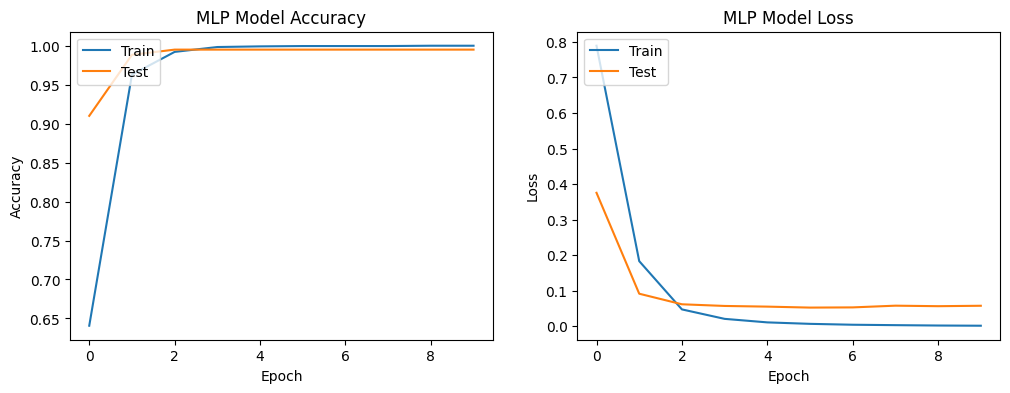

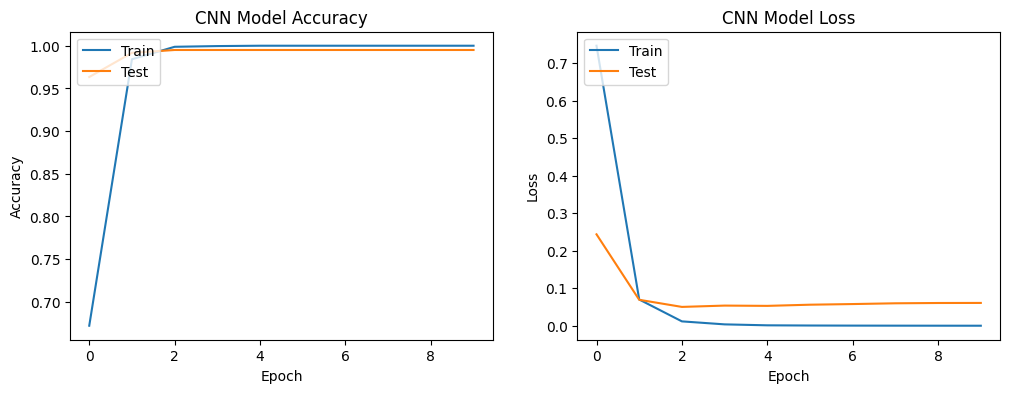

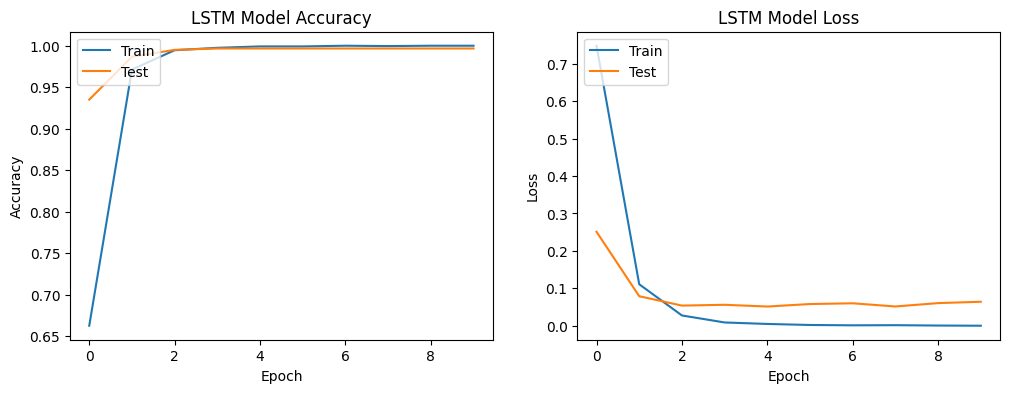

In [10]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

# Plot histories
plot_history(mlp_history, 'MLP')
plot_history(cnn_history, 'CNN')
plot_history(lstm_history, 'LSTM')


Comparsions of models

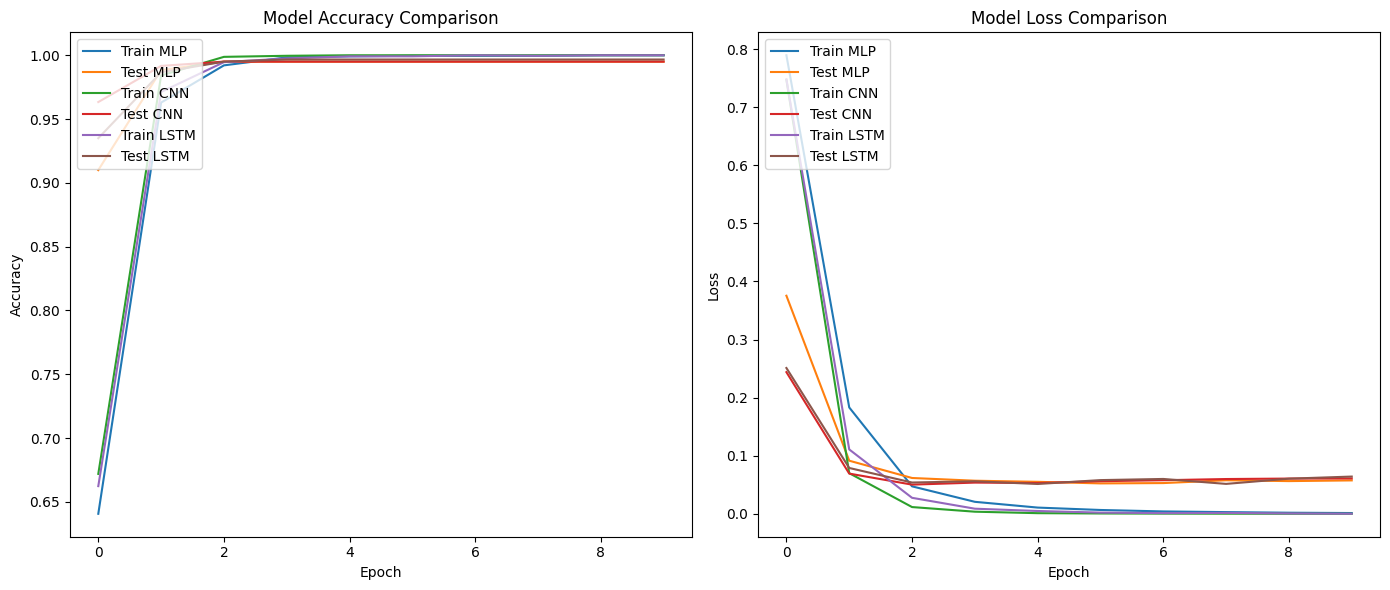

In [11]:
import matplotlib.pyplot as plt

def plot_history(histories, model_names):
    plt.figure(figsize=(14, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    for history, model_name in zip(histories, model_names):
        plt.plot(history.history['accuracy'], label=f'Train {model_name}')
        plt.plot(history.history['val_accuracy'], label=f'Test {model_name}')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    for history, model_name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'Train {model_name}')
        plt.plot(history.history['val_loss'], label=f'Test {model_name}')
    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot comparison of all models
plot_history([mlp_history, cnn_history, lstm_history], ['MLP', 'CNN', 'LSTM'])


Best model prediction

19/19 [==============================] - 2s 92ms/step


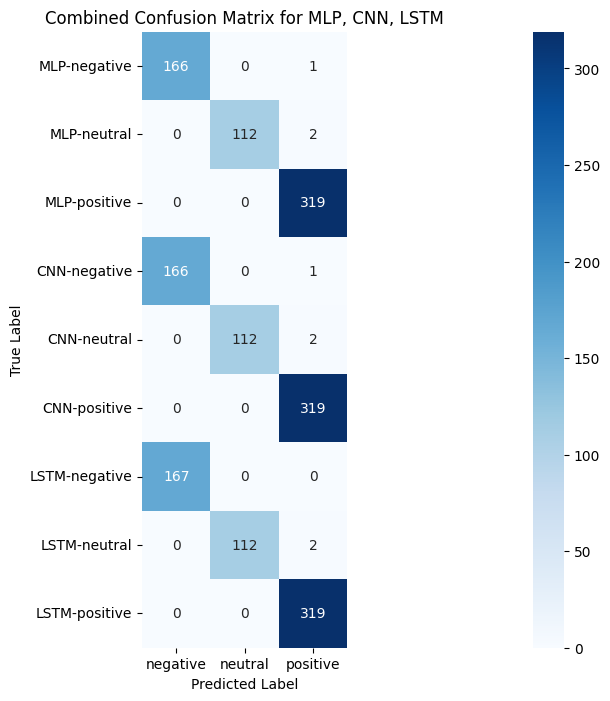

In [28]:
from sklearn.metrics import confusion_matrix

# Dictionary containing the models
models = {
    "MLP": mlp_model,
    "CNN": cnn_model,
    "LSTM": lstm_model
}

# True labels (assuming they are the same for all models)
y_true = np.argmax(y_test, axis=1)
n_classes = len(label_encoder.classes_)

# Initialize a combined matrix of zeros
combined_matrix = np.zeros((n_classes * len(models), n_classes))

# Iterate over models and populate the combined matrix
for i, (model_name, model) in enumerate(models.items()):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute the confusion matrix for the current model
    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    # Place the confusion matrix in the correct location within the combined matrix
    combined_matrix[i * n_classes:(i + 1) * n_classes, :] = conf_matrix

# Round the combined matrix values to integers
combined_matrix = np.round(combined_matrix).astype(int)

# Create labels for the combined matrix
labels = []
for model_name in models.keys():
    labels.extend([f"{model_name}-{cls}" for cls in label_encoder.classes_])

# Plot the combined confusion matrix
plt.figure(figsize=(48,8))
sns.heatmap(combined_matrix, annot=True, fmt='d', cmap='Blues', square=True, cbar=True,
            xticklabels=label_encoder.classes_, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Combined Confusion Matrix for MLP, CNN, LSTM')
plt.show()